In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
import tikzplotlib as tpl
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Times Roman"]})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Chi-squared Bridge

Set up the approximations in standard and transformed base and create plots for the bridge.

In [4]:
# functions

from scipy.special import gamma

def chi2_pdf(x, k):
    nom = x**(k/2 - 1) * np.exp(-x/2)
    den = 2**(k/2) * gamma_func(k/2)
    return(nom/den)

def chi2_t_log_pdf(x, k):
    nom = np.exp(x)**(k/2) * np.exp(-np.exp(x)/2)
    den = 2**(k/2) * gamma_func(k/2)
    return(nom/den)

def chi2_t_sqrt_pdf(x, k):
    nom = x**(k-1) * np.exp(-x**2/2)
    den = 2**(k/2 - 1) * gamma_func(k/2)
    return(nom/den)

def chi2_mu(k):
    return(np.max(k-2, 0))

def chi2_var(k):
    if k <= 2:
        #raise(ValueError('if k is equal to or lower than 2 you cannot fit a normal'))
        print('if k is equal to or lower than 2 you cannot fit a normal')
    return(2*(k-2))

"""Transforms: log"""

def chi2_t_log_mu(k):
    return(np.log(k))

def chi2_t_log_var(k):
    return(2/k)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""Transforms: sqrt"""

def chi2_t_sqrt_mu(k):
    return(np.sqrt(k-1))

def chi2_t_sqrt_var(k):
    return(1/2)

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

In [5]:
#change the basis

##########EXPONENTIAL#############

def plot_chi2_t_log(params, save=False, filename='chi2_log_bridge.pdf', show_back=True):

    #standard
    k1, k2, k3 = params

    x = np.linspace(0,10, 1000 +1)
    y1 = chi2_pdf(x, k1) 
    y2 = chi2_pdf(x, k2) 
    y3 = chi2_pdf(x, k3) 

    mode1 = chi2_mu(k1)
    mode2 = chi2_mu(k2)
    mode3 = chi2_mu(k3)

    sigma1 = np.sqrt(chi2_var(k1))
    sigma2 = np.sqrt(chi2_var(k2))
    sigma3 = np.sqrt(chi2_var(k3))

    approx1 = norm.pdf(x, mode1, sigma1)
    approx2 = norm.pdf(x, mode2, sigma2)
    approx3 = norm.pdf(x, mode3, sigma3)

    #log transform 

    x_t = np.linspace(-3, 4, 1000 +1)
    y1_t_log = chi2_t_log_pdf(x_t, k1) 
    y2_t_log = chi2_t_log_pdf(x_t, k2) 
    y3_t_log = chi2_t_log_pdf(x_t, k3) 

    mode1_t_log = chi2_t_log_mu(k1)
    mode2_t_log = chi2_t_log_mu(k2)
    mode3_t_log = chi2_t_log_mu(k3)

    sigma1_t_log = np.sqrt(chi2_t_log_var(k1))
    sigma2_t_log = np.sqrt(chi2_t_log_var(k2))
    sigma3_t_log = np.sqrt(chi2_t_log_var(k3))

    approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log)
    approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log)
    approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log)

    #back transform
    if show_back:
        y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log) 
        y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log) 
        y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log) 

    #plots:
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw_size=2
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else: 
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
    axs[0].plot(x, approx1, 'r--', lw=lw_size)
    axs[0].plot(x, approx2, 'b--', lw=lw_size)
    axs[0].plot(x, approx3, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw_size, label="$\chi^2$");
    axs[1].plot(x_t, approx1_t_log, 'r--', lw=lw_size)
    axs[1].plot(x_t, approx2_t_log, 'b--', lw=lw_size)
    axs[1].plot(x_t, approx3_t_log, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back: 
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()

    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "chi2_log_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


if k is equal to or lower than 2 you cannot fit a normal


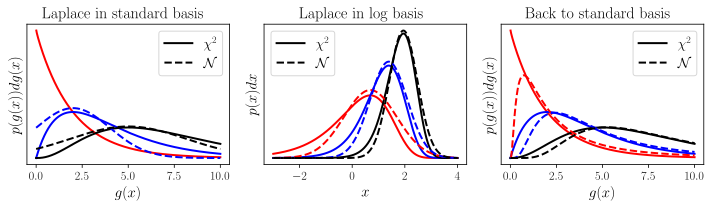

In [6]:
plot_chi2_t_log(params=[1.99, 4, 7], save=True, filename='chi2_log_bridge.pdf', show_back=True)

In [7]:
#change the basis

##############SQUARE###########

def plot_chi2_t_sqrt(params, save=False, filename='chi2_sqrt_bridge.pdf', show_back=True, samples=False):

    #standard
    k1, k2, k3 = params
    x = np.linspace(0,10, 1000 +1)
    y1 = chi2_pdf(x, k1) 
    y2 = chi2_pdf(x, k2) 
    y3 = chi2_pdf(x, k3) 

    mode1 = chi2_mu(k1)
    mode2 = chi2_mu(k2)
    mode3 = chi2_mu(k3)

    sigma1 = np.sqrt(chi2_var(k1))
    sigma2 = np.sqrt(chi2_var(k2))
    sigma3 = np.sqrt(chi2_var(k3))

    approx1 = norm.pdf(x, mode1, sigma1)
    approx2 = norm.pdf(x, mode2, sigma2)
    approx3 = norm.pdf(x, mode3, sigma3)

    #transform 
    if samples:
        from scipy.stats import chi2
        chi2_samples2 = chi2.rvs(k2, size=10000)
        chi2_samples2_sqrt = np.sqrt(chi2_samples2)

    x_t = np.linspace(0, 5, 1000 +1)
    y1_t_sqrt = chi2_t_sqrt_pdf(x_t, k1) 
    y2_t_sqrt = chi2_t_sqrt_pdf(x_t, k2) 
    y3_t_sqrt = chi2_t_sqrt_pdf(x_t, k3) 

    mode1_t_sqrt = chi2_t_sqrt_mu(k1)
    mode2_t_sqrt = chi2_t_sqrt_mu(k2)
    mode3_t_sqrt = chi2_t_sqrt_mu(k3)

    sigma1_t_sqrt = np.sqrt(chi2_t_sqrt_var(k1))
    sigma2_t_sqrt = np.sqrt(chi2_t_sqrt_var(k2))
    sigma3_t_sqrt = np.sqrt(chi2_t_sqrt_var(k3))

    approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
    approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
    approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

    #back transform
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt) 
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt) 
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt) 

    #plots:
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=15
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw_size=2
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else: 
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
    axs[0].plot(x, approx1, 'r--', lw=lw_size)
    axs[0].plot(x, approx2, 'b--', lw=lw_size)
    axs[0].plot(x, approx3, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw_size)
    if samples:
        axs[1].hist(chi2_samples2_sqrt, density=True, alpha=0.5, bins=100)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw_size, label="$\chi^2$");
    axs[1].plot(x_t, approx1_t_sqrt, 'r--', lw=lw_size)
    axs[1].plot(x_t, approx2_t_sqrt, 'b--', lw=lw_size)
    axs[1].plot(x_t, approx3_t_sqrt, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back: 
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()

    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "chi2_sqrt_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
    
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


if k is equal to or lower than 2 you cannot fit a normal


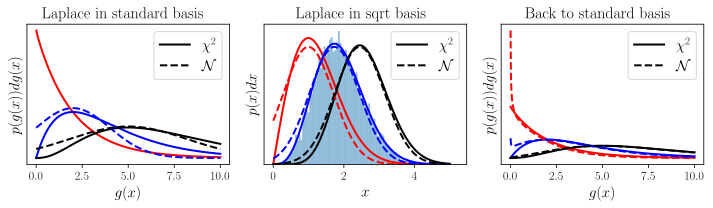

In [8]:
plot_chi2_t_sqrt(params=[1.99, 4, 7], save=True, filename='chi2_sqrt_bridge.pdf', 
                 show_back=True, samples=True)

# Verify the Bridges

Verify that a concatenation of forward and backward transformation yield the identity.

In [9]:
#verify the log bridge

def chi2_t_log_k(m): 
    return(np.exp(m))


test_k1 = 3
test_m1, test_s1 = chi2_t_log_mu(test_k1), np.sqrt(chi2_t_log_var(test_k1))
test_k2 = chi2_t_log_k(test_m1)

print(test_k2)

rand_k1 = np.random.random()
rand_m1, rand_s1 = chi2_t_log_mu(rand_k1), np.sqrt(chi2_t_log_var(rand_k1))
rand_k2 = chi2_t_log_k(rand_m1)

assert(np.allclose(rand_k1, rand_k2))

3.0000000000000004


In [10]:
#verify the log bridge

def chi2_t_sqrt_k(m): 
    return(m**2 + 1)


test_k1 = 5
test_m1, test_s1 = chi2_t_sqrt_mu(test_k1), np.sqrt(chi2_t_sqrt_var(test_k1))
test_k2 = chi2_t_sqrt_k(test_m1)

print(test_k2)

rand_k1 = np.random.random()+1
rand_m1, rand_s1 = chi2_t_sqrt_mu(rand_k1), np.sqrt(chi2_t_sqrt_var(rand_k1))
rand_k2 = chi2_t_sqrt_k(rand_m1)

assert(np.allclose(rand_k1, rand_k2))

5.0


# Statistical distance measures

Compare the Laplace approximation of the Distribution in different bases to ensure we actually improve it. We use mean maximum discrepancy (MMD) and KL-divergence as metrics.

In [11]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, chi2
import torch

## MMD from 100 combinations of parameters

In [12]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    Ks = params
    
    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for k in Ks:
            
            if verbose:
                print("k: ", k)
                
            if k <= 2:
                print("k < 2: not legitimate in standard base")
            
            #get samples from all dists
            #standard
            C2_samples = chi2.rvs(k, size=n_samples)
            if k > 2:                
                mode1 = chi2_mu(k)
                sigma1 = np.sqrt(chi2_var(k))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #log
            mode1_log = chi2_t_log_mu(k)
            sigma1_log = np.sqrt(chi2_t_log_var(k))
            C2_samples_log = np.log(C2_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = chi2_t_sqrt_mu(k)
            sigma1_sqrt = np.sqrt(chi2_t_sqrt_var(k))
            C2_samples_sqrt = np.sqrt(C2_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            C2_samples_ = torch.Tensor(C2_samples.reshape((n_samples, -1)))
            if k > 2:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(C2_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #log
            C2_samples_log_ = torch.Tensor(C2_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(C2_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            C2_samples_sqrt_ = torch.Tensor(C2_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(C2_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(C2_samples, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(C2_samples_log, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(C2_samples_sqrt, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [13]:
MMD_combinations(params=range(2, 12), plot=False, verbose=True, n_samples=2000)

k:  2
k < 2: not legitimate in standard base
standard:  nan log:  0.0276833176612854 sqrt:  0.02033931016921997
k:  3
standard:  0.107259601354599 log:  0.015545070171356201 sqrt:  0.008795082569122314
k:  4
standard:  0.049582481384277344 log:  0.02112102508544922 sqrt:  0.0026776790618896484
k:  5
standard:  0.037281811237335205 log:  0.01110219955444336 sqrt:  0.0033735036849975586
k:  6
standard:  0.023838430643081665 log:  0.008080124855041504 sqrt:  0.002980470657348633
k:  7
standard:  0.01418370008468628 log:  0.007142066955566406 sqrt:  0.0030347108840942383
k:  8
standard:  0.013208284974098206 log:  0.005991876125335693 sqrt:  0.0015612244606018066
k:  9
standard:  0.009521886706352234 log:  0.005273759365081787 sqrt:  0.0013368725776672363
k:  10
standard:  0.010464295744895935 log:  0.002139270305633545 sqrt:  0.0027857422828674316
k:  11
standard:  0.00723537802696228 log:  0.005481839179992676 sqrt:  0.001075446605682373


(nan, 0.10956054925918579, 0.04796004295349121)

# KL-divergence from samples attempt 2

In [14]:
def KL_div_samples_chi2_2(k, num_samples, base='standard', plot=False, rs=1):
    
    
    chi2_samples = chi2.rvs(k, size=num_samples, random_state=rs)
    num_bins = int(np.sqrt(num_samples))
    
    #make sure that base is valid
    assert(base in ['standard', 'log', 'sqrt'])
    
    if base == 'log':
    
        chi2_samples_log = np.log(chi2_samples)
        mu_chi2_log = chi2_t_log_mu(k)
        sigma_chi2_log = np.sqrt(chi2_t_log_var(k))
        
        s = np.array(chi2_samples_log)
        p_ = chi2_t_log_pdf(s, k)
        q_ = norm.pdf(s, mu_chi2_log, sigma_chi2_log)
        KL_div_log_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, chi2_t_log_pdf(x_, k))
            plt.plot(x_, norm.pdf(x_, mu_chi2_log, sigma_chi2_log))
            plt.title('log-base')
            plt.show();
            
        return(KL_div_log_)
    
    elif base == 'sqrt':
    
        chi2_samples_sqrt = np.sqrt(chi2_samples)
        mu_chi2_sqrt = chi2_t_sqrt_mu(k)
        sigma_chi2_sqrt = np.sqrt(chi2_t_sqrt_var(k))
        
        s = np.array(chi2_samples_sqrt)
        p_ = chi2_t_sqrt_pdf(s, k)
        q_ = norm.pdf(s, mu_chi2_sqrt, sigma_chi2_sqrt)
        KL_div_sqrt_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, chi2_t_sqrt_pdf(x_, k))
            plt.plot(x_, norm.pdf(x_, mu_chi2_sqrt, sigma_chi2_sqrt))
            plt.title('sqrt-base')
            plt.show();
            
        return(KL_div_sqrt_)
    
    elif base == 'standard':
    
        mu_chi2 = chi2_mu(k)
        sigma_chi2 = np.sqrt(chi2_var(k))
        
        s = np.array(chi2_samples)
        #p_ = chi2.pdf(s, k)
        p_ = chi2_pdf(s, k)
        q_ = norm.pdf(s, mu_chi2, sigma_chi2)
        KL_div_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, chi2_pdf(x_, k))
            plt.plot(x_, norm.pdf(x_, mu_chi2, sigma_chi2))
            plt.title('standard-base')
            plt.show();

        return(KL_div_)

In [15]:
def KL_div_sample_combinations2(params, num_samples, verbose=True, plot=False):
    
    Ks = params[0]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 


    for k in Ks:
            
        if verbose:
            print("k: ", k)

        if k <= 2:
            print("k <= 2: not legitimate in standard base")

        #compute KL-div for log and sqrt bases
        KL_div_log_ = KL_div_samples_chi2_2(k, num_samples, base='log', plot=plot)
        KL_div_sqrt_ = KL_div_samples_chi2_2(k, num_samples, base='sqrt', plot=plot)

        #calculate the KL divergences for standard base
        if k > 2:
            KL_div_ = KL_div_samples_chi2_2(k, num_samples, base='standard', plot=plot, rs=k)
        else:
            KL_div_ = np.nan

        #add them to their respective sums
        KL_div_sum += KL_div_
        KL_div_t_log_sum += KL_div_log_
        KL_div_t_sqrt_sum += KL_div_sqrt_

        if verbose:
            print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [16]:
print(KL_div_sample_combinations2(params=[range(1, 12)], plot=False, verbose=True, num_samples=10000))

k:  1
k <= 2: not legitimate in standard base
standard:  nan log:  0.8501128025864818 sqrt:  0.8465673460494385
k:  2
k <= 2: not legitimate in standard base
standard:  nan log:  0.3357899012205915 sqrt:  0.12045883850760569
k:  3
standard:  1.660638567701689 log:  0.20367306550432165 sqrt:  0.06298338575078044
k:  4
standard:  0.8067134749255951 log:  0.13798687050085362 sqrt:  0.04058579502843145
k:  5
standard:  0.5430631502523589 log:  0.10335210701431884 sqrt:  0.029874084223005706
k:  6
standard:  0.3996069704319509 log:  0.08327376499019148 sqrt:  0.023435667565906305
k:  7
standard:  0.301014110675153 log:  0.07004256208226624 sqrt:  0.019312998708424362
k:  8
standard:  0.2702898943607513 log:  0.05979850038595008 sqrt:  0.016402103425532565
k:  9
standard:  0.23060251802837947 log:  0.05353023275243513 sqrt:  0.013881349349854681
k:  10
standard:  0.20080658583365826 log:  0.04757536911900249 sqrt:  0.012260118494219877
k:  11
standard:  0.18850960917915258 log:  0.0425075096

# Calculate KL-divergence for growing k and plot it

In [17]:
ks = np.arange(1, 11)

In [18]:
KL_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for k in ks:
        KL_ = KL_div_sample_combinations2(params = [[k]], num_samples=10000)
        results_seed.append(KL_)
    
    KL_results_linear.append(results_seed)

seed:  0
k:  1
k <= 2: not legitimate in standard base
standard:  nan log:  0.8501128025864818 sqrt:  0.8465673460494385
k:  2
k <= 2: not legitimate in standard base
standard:  nan log:  0.3357899012205915 sqrt:  0.12045883850760569
k:  3
standard:  1.660638567701689 log:  0.20367306550432165 sqrt:  0.06298338575078044
k:  4
standard:  0.8067134749255951 log:  0.13798687050085362 sqrt:  0.04058579502843145
k:  5
standard:  0.5430631502523589 log:  0.10335210701431884 sqrt:  0.029874084223005706
k:  6
standard:  0.3996069704319509 log:  0.08327376499019148 sqrt:  0.023435667565906305
k:  7
standard:  0.301014110675153 log:  0.07004256208226624 sqrt:  0.019312998708424362
k:  8
standard:  0.2702898943607513 log:  0.05979850038595008 sqrt:  0.016402103425532565
k:  9
standard:  0.23060251802837947 log:  0.05353023275243513 sqrt:  0.013881349349854681
k:  10
standard:  0.20080658583365826 log:  0.04757536911900249 sqrt:  0.012260118494219877
seed:  1
k:  1
k <= 2: not legitimate in standa

standard:  0.2702898943607513 log:  0.05979850038595008 sqrt:  0.016402103425532565
k:  9
standard:  0.23060251802837947 log:  0.05353023275243513 sqrt:  0.013881349349854681
k:  10
standard:  0.20080658583365826 log:  0.04757536911900249 sqrt:  0.012260118494219877
seed:  9
k:  1
k <= 2: not legitimate in standard base
standard:  nan log:  0.8501128025864818 sqrt:  0.8465673460494385
k:  2
k <= 2: not legitimate in standard base
standard:  nan log:  0.3357899012205915 sqrt:  0.12045883850760569
k:  3
standard:  1.660638567701689 log:  0.20367306550432165 sqrt:  0.06298338575078044
k:  4
standard:  0.8067134749255951 log:  0.13798687050085362 sqrt:  0.04058579502843145
k:  5
standard:  0.5430631502523589 log:  0.10335210701431884 sqrt:  0.029874084223005706
k:  6
standard:  0.3996069704319509 log:  0.08327376499019148 sqrt:  0.023435667565906305
k:  7
standard:  0.301014110675153 log:  0.07004256208226624 sqrt:  0.019312998708424362
k:  8
standard:  0.2702898943607513 log:  0.059798500

In [19]:
# handle the data
KL_results_linear = np.array(KL_results_linear)

# take the mean over the 10 seeds
KL_results_linear_mean = KL_results_linear.mean(0)
print(np.shape(KL_results_linear_mean))

(10, 3)


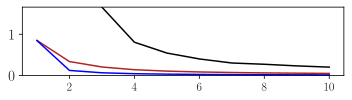

In [20]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(ks, KL_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(ks, KL_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(ks, KL_results_linear_mean[:,2], label='sqrt base', color='blue')
plt.ylim(0, np.nanmax(KL_results_linear_mean))
plt.tight_layout()

#"""
tpl.save(
    "KL_Chi2.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g"
)
#"""

plt.savefig('KL_Chi2.pdf')

plt.show();

# Calculate MMD for growing k and plot it

In [21]:
MMD_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for k_ in ks:
        MMD_ = MMD_combinations(params = [k_], n_samples=2000)
        results_seed.append(MMD_)
    
    MMD_results_linear.append(results_seed)

seed:  0
k:  1
k < 2: not legitimate in standard base
standard:  nan log:  0.041663944721221924 sqrt:  0.21511220932006836
k:  2
k < 2: not legitimate in standard base
standard:  nan log:  0.027416110038757324 sqrt:  0.02044224739074707
k:  3
standard:  0.11390906572341919 log:  0.024241924285888672 sqrt:  0.007532954216003418
k:  4
standard:  0.04955551028251648 log:  0.013311922550201416 sqrt:  0.0034952759742736816
k:  5
standard:  0.03155384957790375 log:  0.008710861206054688 sqrt:  0.005166411399841309
k:  6
standard:  0.02124306559562683 log:  0.0055329203605651855 sqrt:  0.003086090087890625
k:  7
standard:  0.016768857836723328 log:  0.003038644790649414 sqrt:  0.004432857036590576
k:  8
standard:  0.013364017009735107 log:  0.008250951766967773 sqrt:  0.0016995668411254883
k:  9
standard:  0.010743141174316406 log:  0.003862738609313965 sqrt:  0.0025531649589538574
k:  10
standard:  0.006526336073875427 log:  0.007264435291290283 sqrt:  0.0006232261657714844
seed:  1
k:  1
k 

standard:  0.03182128071784973 log:  0.01005011796951294 sqrt:  0.002658367156982422
k:  6
standard:  0.0246029794216156 log:  0.008680164813995361 sqrt:  0.0029934048652648926
k:  7
standard:  0.015094459056854248 log:  0.0073664188385009766 sqrt:  0.001837015151977539
k:  8
standard:  0.012083321809768677 log:  0.009870707988739014 sqrt:  0.00038909912109375
k:  9
standard:  0.008907809853553772 log:  0.003579437732696533 sqrt:  0.0018045902252197266
k:  10
standard:  0.011381730437278748 log:  0.0030370354652404785 sqrt:  0.002723991870880127
seed:  9
k:  1
k < 2: not legitimate in standard base
standard:  nan log:  0.04184454679489136 sqrt:  0.21009159088134766
k:  2
k < 2: not legitimate in standard base
standard:  nan log:  0.02810913324356079 sqrt:  0.014207065105438232
k:  3
standard:  0.10282436013221741 log:  0.019328415393829346 sqrt:  0.00864630937576294
k:  4
standard:  0.05528262257575989 log:  0.01576918363571167 sqrt:  0.003739655017852783
k:  5
standard:  0.03727959096

In [22]:
# handle the data
MMD_results_linear = np.array(MMD_results_linear)

# take the mean over the 10 seeds
MMD_results_linear_mean = MMD_results_linear.mean(0)
print(np.shape(MMD_results_linear_mean))

(10, 3)


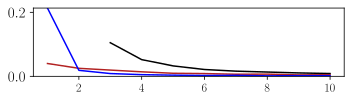

In [23]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(ks, MMD_results_linear_mean[:,0], color='black')
plt.plot(ks, MMD_results_linear_mean[:,1], color='firebrick')
plt.plot(ks, MMD_results_linear_mean[:,2], color='blue')
plt.ylim(0, np.nanmax(MMD_results_linear_mean))
plt.tight_layout()

#"""
tpl.save(
    "MMD_Chi2.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g"
)
#"""

plt.savefig('MMD_Chi2.pdf')

plt.show();